# Задание 9.
В файле electric_power.xml - данные о почасовом потреблении электроэнергии за два года.
Укрупните данные до суточного потребления. Спрогнозируйте потребление на 7 суток вперед. Оцените качество прогноза с помощью пары метрик.
Продемонстрируйте результат визуально на графике.


In [358]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

matplotlib.style.use('ggplot')
%matplotlib inline

In [359]:
df = pd.read_csv('electric power.csv', sep=";", header = 0, parse_dates=[1], dayfirst=True)
df.head()

,VALUE,DATE,HOUR
0,526583,2010-10-31,3
1,471157,2009-10-25,3
2,405140,2010-01-29,24
3,404220,2010-01-29,23
4,400739,2010-01-29,19


In [360]:
df.shape

(17518, 3)

In [361]:
df.dtypes

VALUE             int64
DATE     datetime64[ns]
HOUR              int64
dtype: object

Добавим новые даты, для которых будем предсказывать значение

In [362]:
df_new_date = pd.concat([df, pd.DataFrame(data={'DATE': pd.date_range(df.DATE.max(),
                                                                      df.DATE.max() + dt.timedelta(days=7))})], ignore_index=True).copy()
df_new_date

,VALUE,DATE,HOUR
0,526583.0,2010-10-31,3.0
1,471157.0,2009-10-25,3.0
2,405140.0,2010-01-29,24.0
3,404220.0,2010-01-29,23.0
4,400739.0,2010-01-29,19.0
...,...,...,...
17521,NaN,2011-01-03,NaN
17522,NaN,2011-01-04,NaN
17523,NaN,2011-01-05,NaN
17524,NaN,2011-01-06,NaN


In [363]:
df_new_date.shape

(17526, 3)

In [364]:
df_new_date.dtypes

VALUE           float64
DATE     datetime64[ns]
HOUR            float64
dtype: object

In [365]:
df_days_gr = df_new_date.groupby(df_new_date.DATE.dt.date).\
    sum().reset_index()
df_days_gr['DATE'] = pd.to_datetime(df_days_gr['DATE'])
df_days_gr.head()

,DATE,VALUE,HOUR
0,2009-01-01,5830312.0,300.0
1,2009-01-02,5865441.0,300.0
2,2009-01-03,5949114.0,300.0
3,2009-01-04,6067779.0,300.0
4,2009-01-05,6115772.0,300.0


In [366]:
day_of_year = pd.get_dummies(df_days_gr.DATE.dt.dayofyear, prefix='day_of_year', drop_first=True)

In [367]:
df_days_gr = pd.concat((df_days_gr, day_of_year), axis=1)

In [368]:
df_days_gr.drop(['HOUR'], axis=1, inplace=True)

In [369]:
df_days_gr['number'] = range(1, len(df_days_gr) + 1)

In [370]:
df_days_gr

,DATE,VALUE,day_of_year_2,day_of_year_3,day_of_year_4,day_of_year_5,day_of_year_6,day_of_year_7,day_of_year_8,day_of_year_9,...,day_of_year_357,day_of_year_358,day_of_year_359,day_of_year_360,day_of_year_361,day_of_year_362,day_of_year_363,day_of_year_364,day_of_year_365,number
0,2009-01-01,5830312.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2009-01-02,5865441.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,2009-01-03,5949114.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,2009-01-04,6067779.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,2009-01-05,6115772.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,2011-01-03,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,733
733,2011-01-04,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,734
734,2011-01-05,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,735
735,2011-01-06,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,736


In [371]:
X = df_days_gr.iloc[:-7, 2:]
y = df_days_gr.iloc[:-7, 1]

In [372]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

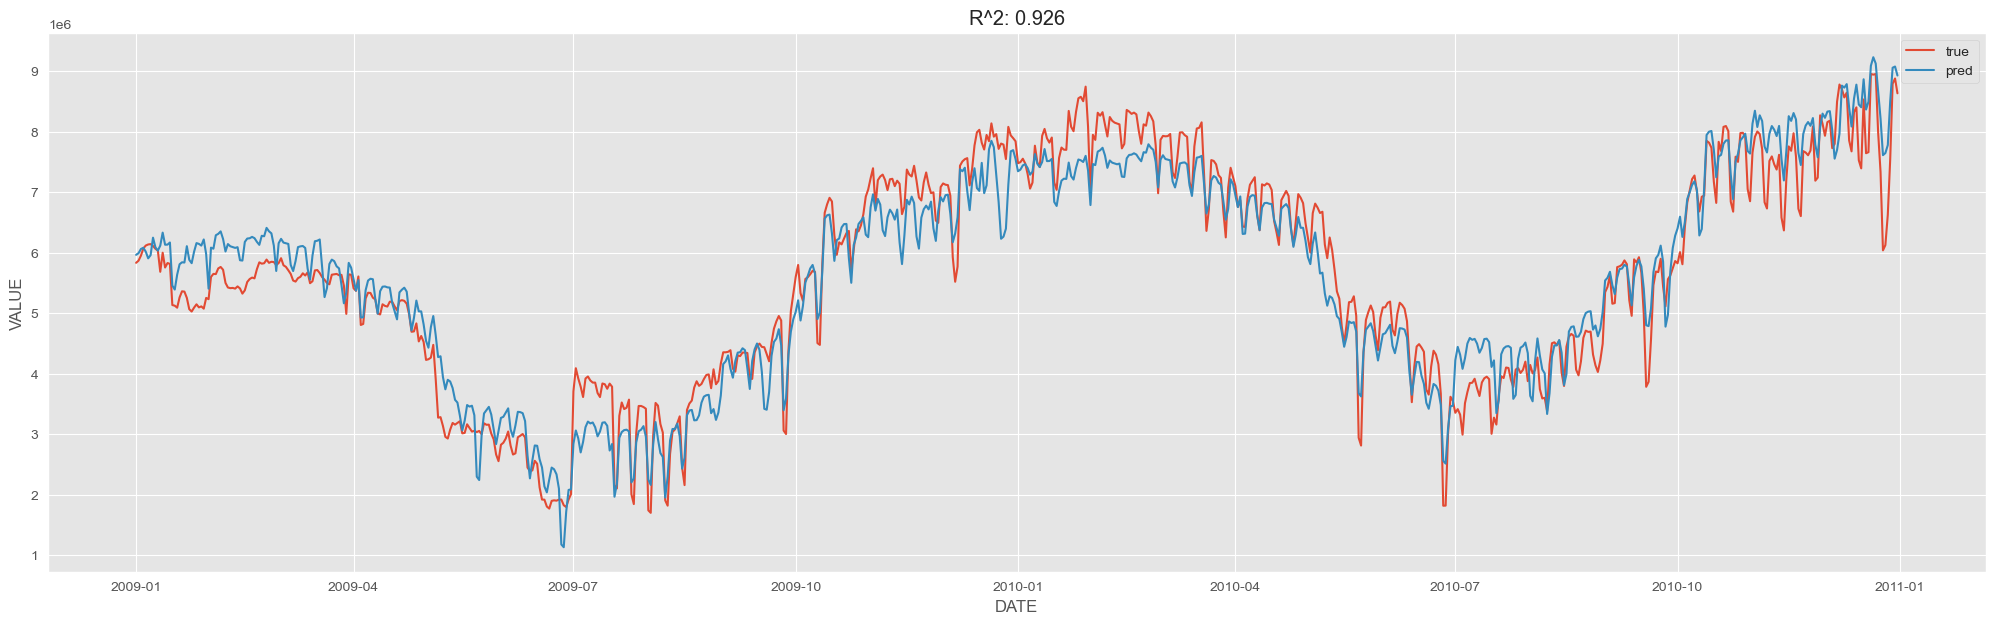

In [373]:
from sklearn.metrics import r2_score

plt.figure(figsize=(25, 7))
sns.lineplot(x=df_days_gr.iloc[:-7, 0], y=y, label='true')
sns.lineplot(x=df_days_gr.iloc[:-7, 0], y=y_pred, label='pred')
plt.title(f'R^2: {round(r2_score(y, y_pred), 3)}')
plt.show()

Предскажем значения для 7 дней

In [387]:
print('Предсказанные значения')
pd.DataFrame(data={'DATE': df_days_gr.iloc[-7:, 0], 'VALUE': model.predict(df_days_gr.iloc[-7:, 2:])})

Предсказанные значения


,DATE,VALUE
730,2011-01-01,8.725246e+06
731,2011-01-02,8.752076e+06
732,2011-01-03,8.822075e+06
733,2011-01-04,8.841944e+06
734,2011-01-05,8.777839e+06
735,2011-01-06,8.667478e+06
736,2011-01-07,8.719710e+06


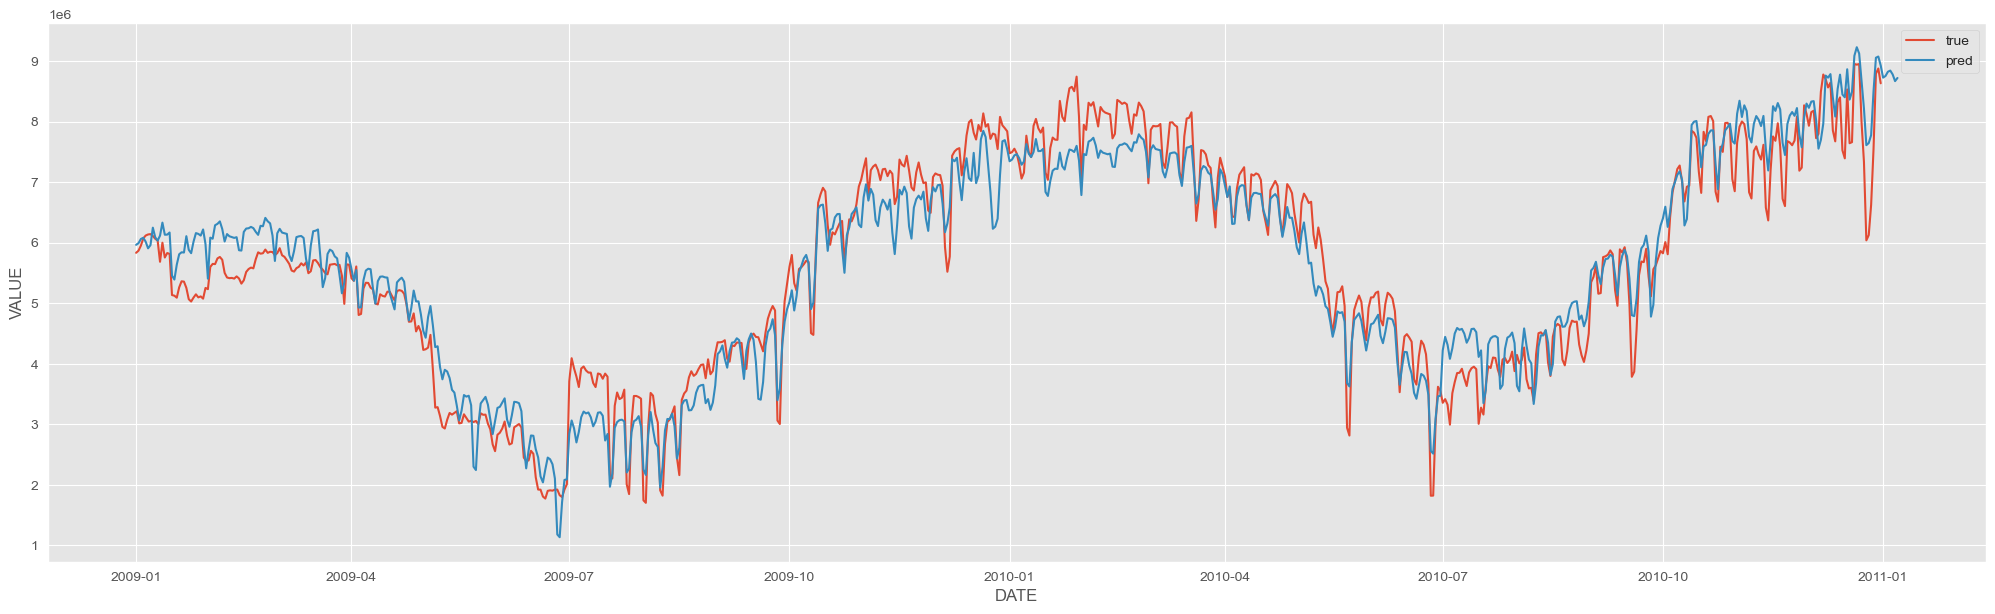

In [374]:
plt.figure(figsize=(25, 7))
sns.lineplot(x=df_days_gr.iloc[:-7, 0], y=y, label='true')
sns.lineplot(x=df_days_gr.iloc[:, 0], y=model.predict(df_days_gr.iloc[:, 2:]), label='pred')
plt.show()